<a href="https://colab.research.google.com/github/JuliMillan/Diversidad_rol/blob/main/Copia_de_Diversidad_rol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import matplotlib.patches as mpatches
from scipy import stats
import folium
import scipy.stats as ss
import squarify
plt.rcParams.update({'font.size':14})

###Correr si no tenés montado GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Funciones útiles

In [144]:
def normalidad(datos, alfa):
  k2, p = stats.normaltest(edades, nan_policy='omit')
  print("p = {:g}".format(p))
  if p < alpha:  # Hipótesis nula: la distribución proviene de una distribución Guassiana
    print("La distribución no es normal")
  else:
    print("La distribución parece normal")



def pie_plot(datos, explode, titulo, color=sns.color_palette('Set2')):
  d = datos.value_counts()
  pie, ax = plt.subplots(figsize=[10,6])
  labels=d.keys()
  plt.pie(x=d, autopct='%.1f%%', 
          explode=explode, labels=labels, 
          pctdistance=0.5, startangle=90,
          colors = color)
  ax.axis('equal')
  plt.title('{}'.format(titulo), fontsize=14, pad=30.0)
  plt.tight_layout()
  return plt.show()


def heat_map(columna_1, columna_2):
  matriz = pd.crosstab(index=columna_1, columns=columna_2)
  fig = sns.heatmap(matriz)
  return matriz, fig

def tree_plot(datos, columna, titulo):
  d = pd.DataFrame(datos.value_counts().reset_index())
  d.columns = [columna, 'conteo']
  color=sns.color_palette("inferno")
  fig, ax = plt.subplots(figsize=(10, 6))
  squarify.plot(sizes=d['conteo'], label=d[columna], alpha=.7, color=color)
  plt.axis('off')
  plt.title('{}'.format(titulo), fontsize=14)
  return plt.show()

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

##Exploramos los datos

In [ ]:
archivo = "/content/drive/MyDrive/Copia de Diversidad sexual y de género en el mundo de los juegos de rol (respuestas) - Respuestas de formulario 1.csv"
df = pd.read_csv(archivo)
df.head(3)

,Marca temporal,Qué edad tenés?,Qué juego/s jugás?,Participás como,Con qué género te identificás?,"En relación al género que se te asignó al nacer, te considerás",Cuál es tu orientación sexual?,Alguna vez sufriste discriminación (como jugadorx) por tu género u orientación sexual durante una partida?,Presenciaste algún tipo de discriminación hacia otra persona?,"En caso de haber sufrido/presenciado casos de discriminación, reaccionaste de alguna manera?",Tus grupos de juego normalmente están conformados por,En qué país naciste?,En qué país vivís?,"Algo que quieras agregar, contar, comentar, criticar?"
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina,NaN
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 14 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Marca temporal                                                                                               146 non-null    object 
 1   Qué edad tenés?                                                                                              139 non-null    float64
 2   Qué juego/s jugás?                                                                                           145 non-null    object 
 3   Participás como                                                                                              145 non-null    object 
 4   Con qué género te identificás?                                

In [ ]:
df.columns = [
              'fecha', 'edad', 'juegos', 'rol', 'genero', 'cistrans', 'sexualidad', 
              'discriminacion_personal', 'discriminacion_otre', 'reaccion',
              'grupo', 'nacimiento', 'residencia', 'comentario'
              ]

df.head(3)

,fecha,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia,comentario
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina,NaN
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN


In [ ]:
df1 = df.iloc[:,1:13]
df1.head(3)

,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


##Edades y género

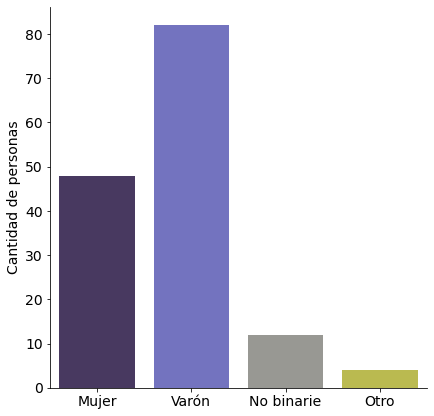

In [ ]:
figure = sns.catplot(x="genero", kind="count", palette="gist_stern", 
                     data=df1, order=['Mujer', 'Varón', 'No binarie','Otro'], height=6)
plt.xlabel('')
plt.ylabel('Cantidad de personas')
plt.show()

In [ ]:
edades = (df1['edad'])
#print(edades)
print(edades.shape)
#print(type(edades))
print(edades.describe())
edades_np = edades.dropna()
edades_np = edades_np.to_numpy()
#print(type(edades_np))
print(edades_np.mean())


(146,)
count    139.000000
mean      30.366906
std        6.739612
min       16.000000
25%       26.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: edad, dtype: float64
30.366906474820144


In [ ]:
mediana = (edades.median())
print('La edad más representada es {} años, con {} personas.'.format(int(mediana), np.sum([df1['edad']==mediana])))

La edad más representada es 30 años, con 16 personas.


In [ ]:
edad_maxima = int(edades.max())
edad_minima = int(edades.min())
print('Edad máxima: ', edad_maxima ,'\nEdad mínima: ', edad_minima)

Edad máxima:  51 
Edad mínima:  16


In [ ]:
alpha = 1e-3
normalidad(edades_np, alpha)

p = 0.105404
La distribución parece normal


In [ ]:
edades_genero = df1[['edad', 'genero']]
#edades_genero.head(3)

,edad,genero
0,29.0,Mujer
1,29.0,Mujer
2,32.0,Varón


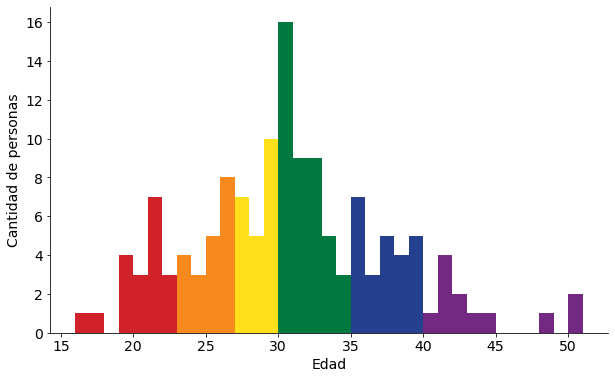

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
bin=(edad_maxima-edad_minima)

N, bins, patches = ax.hist(edades, bins=bin)

for i in range(0,7):
    patches[i].set_facecolor('#D12229')
for i in range(7,11):    
    patches[i].set_facecolor('#F68A1E')
for i in range(11,16):
    patches[i].set_facecolor('#FDE01A')
for i in range(14,19):
    patches[i].set_facecolor('#007940')
for i in range(19,24):    
    patches[i].set_facecolor('#24408E')
for i in range(24, len(patches)):
    patches[i].set_facecolor('#732982')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')


plt.show()

In [ ]:
edades_m = edades_genero[edades_genero['genero']=='Mujer'].dropna()
edades_v = edades_genero[edades_genero['genero']=='Varón'].dropna()
edades_nb = edades_genero[edades_genero['genero']=='No binarie'].dropna()
edades_o = edades_genero[edades_genero['genero']=='Otro'].dropna()

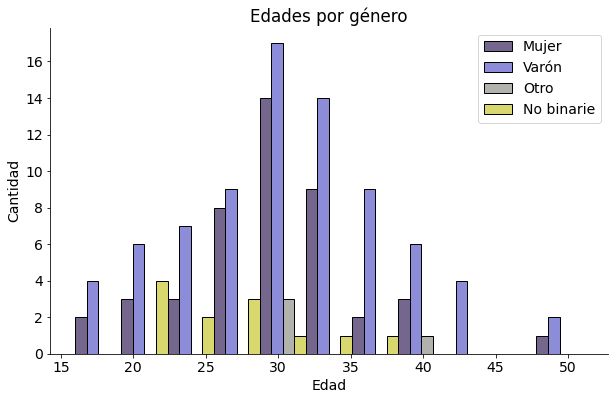

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.histplot(data=edades_genero, x="edad", hue="genero", 
                      multiple="dodge", palette='gist_stern')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Edades por género')
fig.get_legend().set_title(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


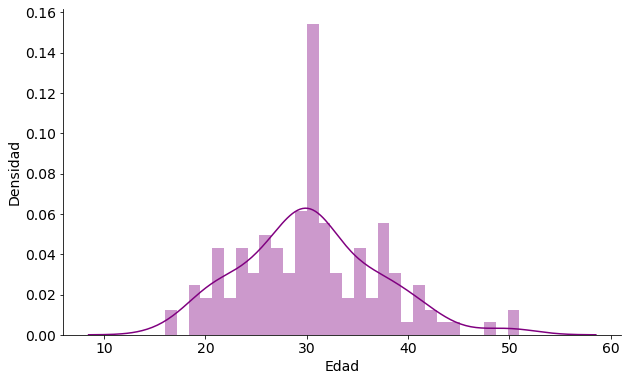

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.distplot(edades_genero['edad'], bins=30, color='purple')
plt.xlabel('Edad')
plt.ylabel('Densidad')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

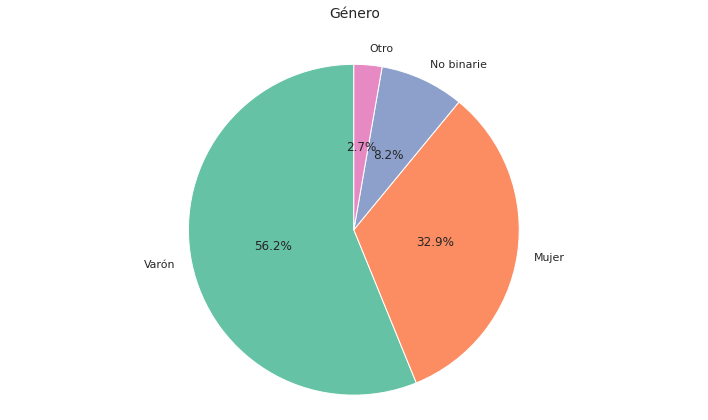

In [145]:
pie_plot(df1['genero'], np.zeros(4), 'Género')

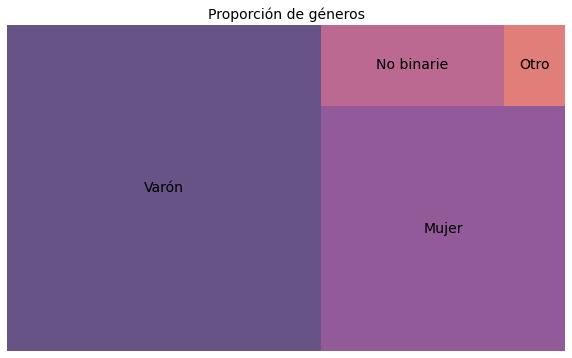

In [ ]:
tree_plot(df1['genero'], 'genero', 'Proporción de géneros')

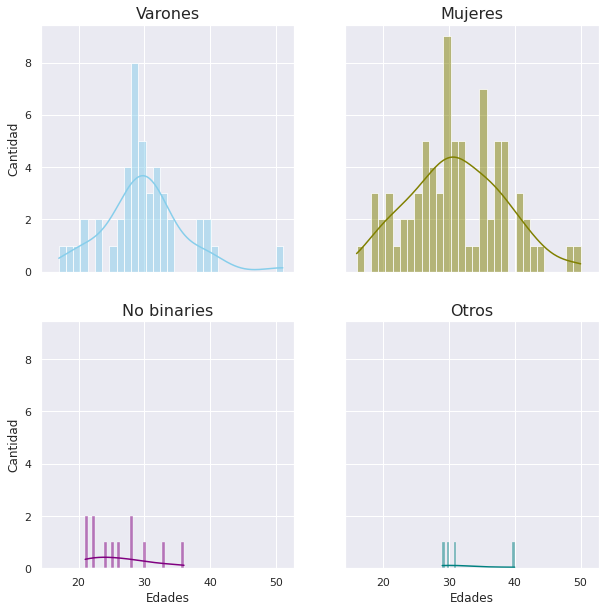

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
bins=31

with sns.axes_style("darkgrid"):
  sns.histplot(edades_m, x="edad", kde=True, color="skyblue", ax=axs[0, 0], bins=bins).set_title('Varones', size=16)
  sns.histplot(edades_v, x="edad", kde=True, color="olive", ax=axs[0, 1], bins=bins).set_title('Mujeres', size=16)
  sns.histplot(edades_nb, x="edad", kde=True, color="purple", ax=axs[1, 0], bins=bins).set_title('No binaries', size=16)
  sns.histplot(edades_o, x="edad", kde=True, color="teal", ax=axs[1, 1],bins=bins).set_title('Otros', size=16)

  plt.setp(axs[-1, :], xlabel='Edades')
  plt.setp(axs[:, 0], ylabel='Cantidad')

  plt.show()

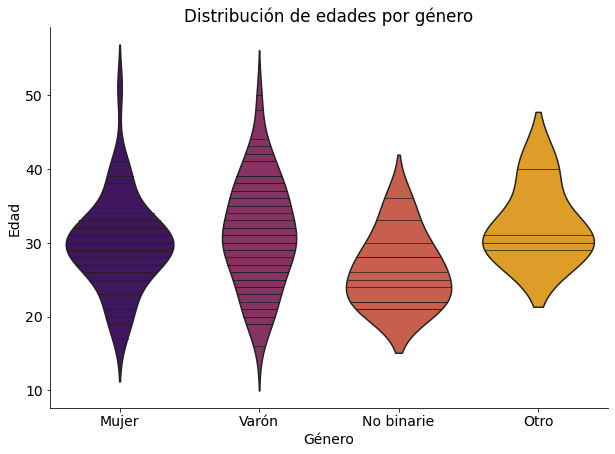

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x=df1.genero, y=df1.edad, palette="inferno", inner='stick', order=['Mujer', 'Varón', 'No binarie','Otro'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribución de edades por género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

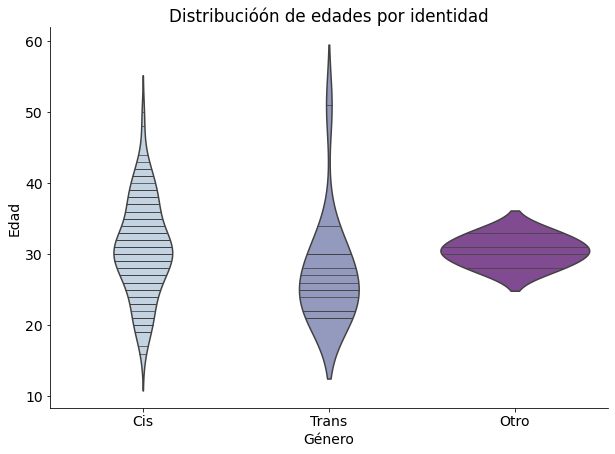

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x=df1.cistrans, y=df1.edad, palette="BuPu", inner='stick')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribucióón de edades por identidad')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

##Juegos

In [ ]:
type(df['juegos'])

pandas.core.series.Series

In [ ]:
juegos1 = df['juegos'].dropna()
type(juegos1)

pandas.core.series.Series

In [ ]:
juegos = [j.split(';') for j in juegos1]
flat_list = [item for sublist in juegos for item in sublist]
juegos_ = [i.split(', ') for i in flat_list]
otra_vez = [item for sublist in juegos_ for item in sublist]
print(len(otra_vez))

363


In [ ]:
#Cuento la cantidad de veces que aparece un juego
contador = Counter(otra_vez)
#Uso los juegos que más aparecen para armar un dataframe
mas_comunes = contador.most_common(11)
juegos_mas_comunes = pd.DataFrame(mas_comunes)
juegos_mas_comunes
print(mas_comunes)

[('Dungeons & Dragons 5E', 93), ('La Llamada de Cthulhu', 40), ('Vampiros', 35), ('Pathfinder', 33), ('Dungeons & Dragons 3.5', 32), ('Hombre Lobo', 9), ('GURPS', 9), ('PbtA', 8), ('Warhammer', 5), ('Indies', 5), ('Homebrew', 4)]


In [ ]:
#labels = [item[0] for item in mas_comunes]
#cantidad = [item[1] for item in mas_comunes]
#nbars = len(mas_comunes)

#plt.bar(np.arange(nbars), cantidad, tick_label=labels)
#plt.show()

In [ ]:
#Armo un dataframe con los juegos más comunes y la cantidad de veces que aparecen
datos = pd.DataFrame(mas_comunes)
datos.columns=['juego', 'cantidad']
datos

,juego,cantidad
0,Dungeons & Dragons 5E,93
1,La Llamada de Cthulhu,40
2,Vampiros,35
3,Pathfinder,33
4,Dungeons & Dragons 3.5,32
5,Hombre Lobo,9
6,GURPS,9
7,PbtA,8
8,Warhammer,5
9,Indies,5


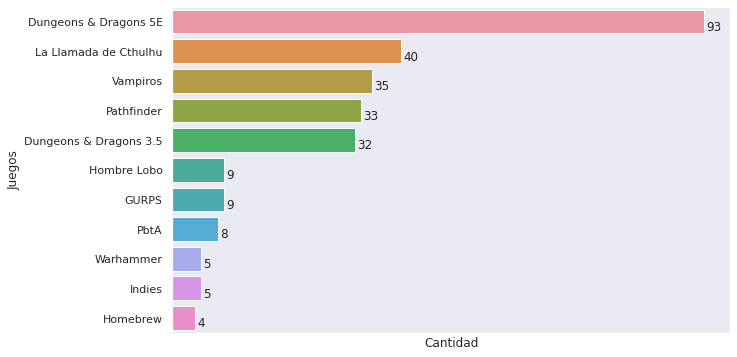

In [108]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='cantidad', y='juego', data=datos)
#Para mostrar los valores a la derecha de las barras
for p in ax.patches:
  _x = p.get_x() + p.get_width() + .4
  _y = p.get_y() + p.get_height()
  value = int(p.get_width())
  ax.text(_x, _y, value, ha="left", va='bottom')
plt.xticks([])
plt.xlabel('Cantidad')
plt.ylabel('Juegos')
plt.show()

In [ ]:
#Agrego al dataframe una columna con los porcentajes
total = len(otra_vez)
datos['porcentaje'] = ((datos['cantidad']*100)/total)
datos

,juego,cantidad,porcentaje
0,Dungeons & Dragons 5E,93,25.619835
1,La Llamada de Cthulhu,40,11.019284
2,Vampiros,35,9.641873
3,Pathfinder,33,9.090909
4,Dungeons & Dragons 3.5,32,8.815427
5,Hombre Lobo,9,2.479339
6,GURPS,9,2.479339
7,PbtA,8,2.203857
8,Warhammer,5,1.377410
9,Indies,5,1.377410


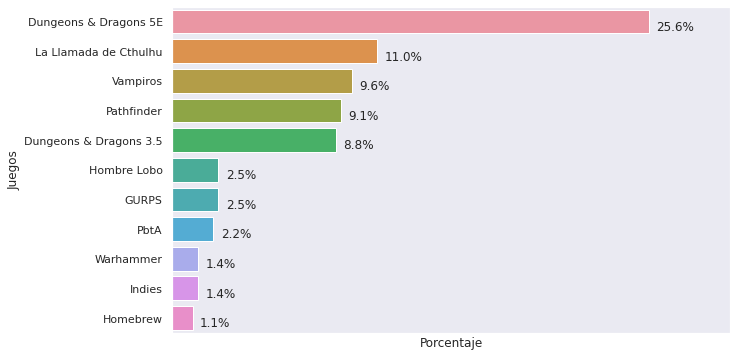

In [136]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='porcentaje', y='juego', data=datos)
#Para mostrar los valores a la derecha de las barras horizontales, en formato porcentaje
for p in ax.patches:
  _x = p.get_x() + p.get_width() + .4
  _y = p.get_y() + p.get_height()
  value = "{:.1f}%".format(p.get_width())
  ax.text(_x, _y, value, ha="left", va='bottom')
plt.xticks([])
plt.xlim([0,30])
plt.xlabel('Porcentaje')
plt.ylabel('Juegos')
plt.show()

In [ ]:
#Falta hacerlo por género

##Cis/Trans

In [ ]:
df1.head()

,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
3,32.0,"Dungeons & Dragons 3.5, Homebrew",Jugadorx,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
4,30.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5,...",Ambos,Varón,NaN,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


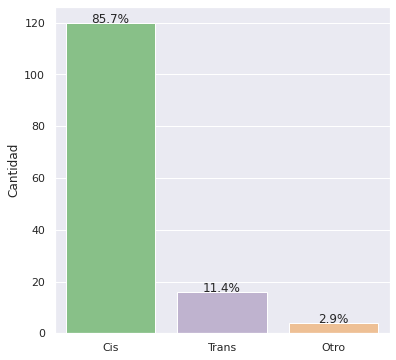

In [160]:
total=df1['cistrans'].count()
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(x="cistrans", data=df1, palette='Accent')
#Para mostrar los valores sobre las barras verticales
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = "{:.1f}%".format((int(p.get_height())*100)/total)
  ax.text(_x, _y, value, ha="center") 
plt.xlabel('')
plt.ylabel('Cantidad')
#plt.yticks([])
plt.show()

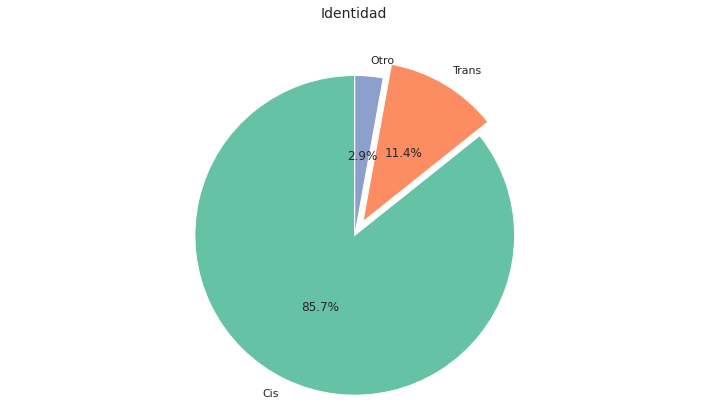

In [146]:
pie_plot(df1['cistrans'],[0,.1,0], 'Identidad')

##Sexualidad

In [ ]:
df1['sexualidad'].value_counts()

Heterosexual    78
Bisexual        40
Homosexual      11
Pansexual        7
Asexual          6
Otro             4
Name: sexualidad, dtype: int64

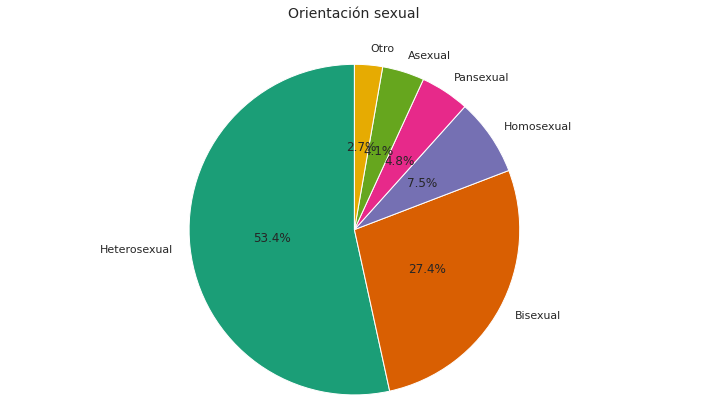

In [165]:
pie_plot(df1['sexualidad'], np.zeros(6), 'Orientación sexual', sns.color_palette("Dark2"))

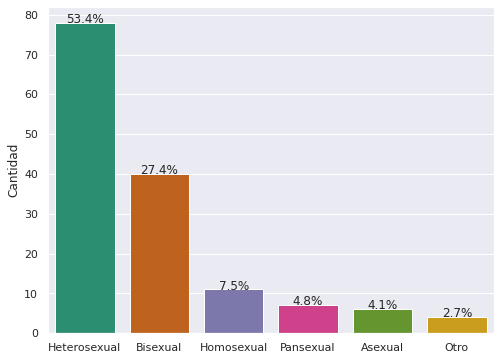

In [196]:
total=df1['sexualidad'].count()
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="sexualidad", data=df1, palette='Dark2', order=df1['sexualidad'].value_counts().index)
#Para mostrar los valores sobre las barras verticales
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:.1f}%'.format(int(p.get_height()*100)/total)
  ax.text(_x, _y, value, ha="center") 
plt.xlabel('')
plt.ylabel('Cantidad')
plt.show()

##Discriminación

In [ ]:
df1.head()

,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
3,32.0,"Dungeons & Dragons 3.5, Homebrew",Jugadorx,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
4,30.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5,...",Ambos,Varón,NaN,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


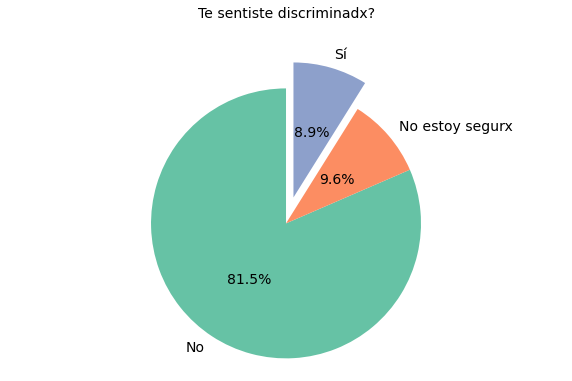

In [ ]:
pie_plot(df1['discriminacion_personal'], [0,0,.2], 'Te sentiste discriminadx?')

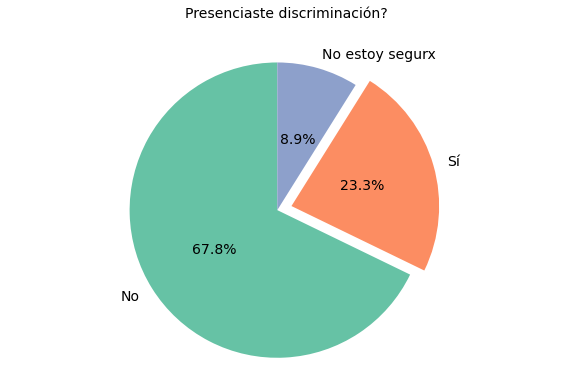

In [ ]:
pie_plot(df1['discriminacion_otre'], [0,.1,0], 'Presenciaste discriminación?')

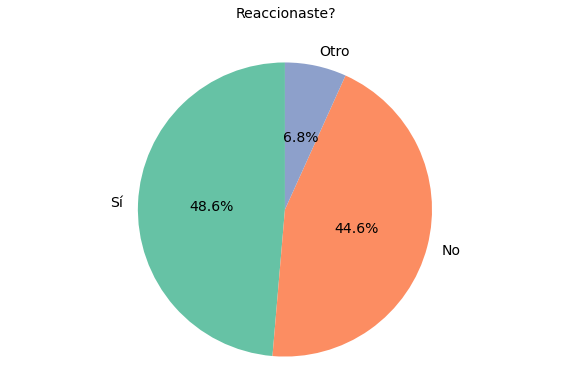

In [ ]:
pie_plot(df1['reaccion'], np.zeros(3), 'Reaccionaste?')
#df1.reaccion.str.get_dummies().sum().plot.pie(label='Reaccionaste?', autopct='%1.0f%%')

##Grupos

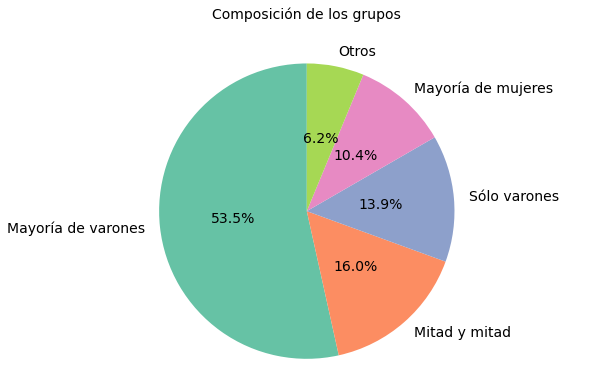

In [ ]:
pie_plot(df1['grupo'], np.zeros(5), 'Composición de los grupos')

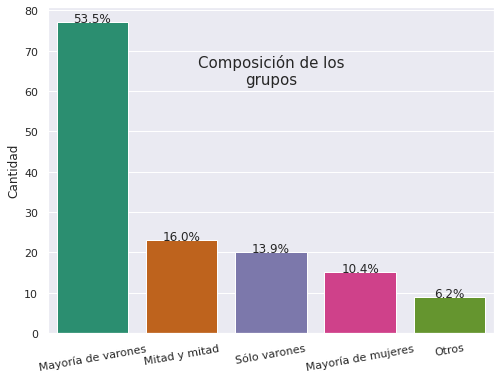

In [198]:
total=df1['grupo'].count()
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="grupo", data=df1, palette='Dark2', order=df1['grupo'].value_counts().index)
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:.1f}%'.format(int(p.get_height()*100)/total)
  ax.text(_x, _y, value, ha="center") 
plt.xlabel('')
plt.xticks(rotation=10, ha='center')
plt.ylabel('Cantidad')
#Personalizar la localización del título
ax.set_title('Composición de los\ngrupos', fontsize=15, loc='center', y=0.9,  pad= -45)
plt.show()

##Correlaciones

In [ ]:
df1.head()

,edad,juegos,rol,genero,cistrans,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugador,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
3,32.0,"Dungeons & Dragons 3.5, Homebrew",Jugadorx,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
4,30.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5,...",Ambos,Varón,NaN,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


In [200]:
cramers_v(df1['genero'], df1['discriminacion_personal'])

0.25008724071461536

In [201]:
cramers_v(df1['genero'], df1['discriminacion_otre'])

0.0

In [202]:
cramers_v(df1['sexualidad'], df1['discriminacion_personal'])

0.10341231498049532

In [203]:
cramers_v(df1['cistrans'], df1['discriminacion_personal'])

0.1839448873582002

In [208]:
# importing the required function
from scipy.stats import chi2_contingency

CrosstabResult=pd.crosstab(index=df1['genero'],columns=df1['discriminacion_personal'])
print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

discriminacion_personal  No  No estoy segurx  Sí
genero                                          
Mujer                    34                8   6
No binarie                8                1   3
Otro                      1                2   1
Varón                    76                3   3
The P-Value of the ChiSq Test is: 0.0005108324495840528


In [236]:
ctb=CrosstabResult.sort_values(by=['No'], ascending=False)
ctb

discriminacion_personal,No,No estoy segurx,Sí
genero,,,
Varón,76,3,3
Mujer,34,8,6
No binarie,8,1,3
Otro,1,2,1


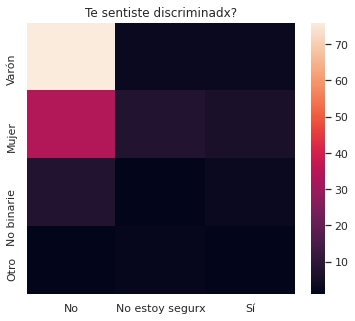

In [238]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(ctb)
plt.title('Te sentiste discriminadx?')
plt.ylabel('')
plt.xlabel('')
plt.show()

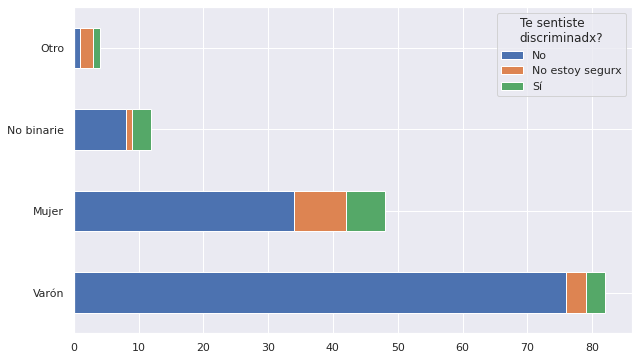

In [239]:
fig = ctb.plot.barh(stacked=True, figsize=(10,6))
plt.legend(title='Te sentiste\ndiscriminadx?')
plt.ylabel('')
plt.show()

(rol         Ambos  GM  Jugador  Jugadorx
 genero                                  
 Mujer          13   0        1        33
 No binarie      6   1        0         5
 Otro            3   0        0         1
 Varón          46   8        0        28,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc886d5b490>)

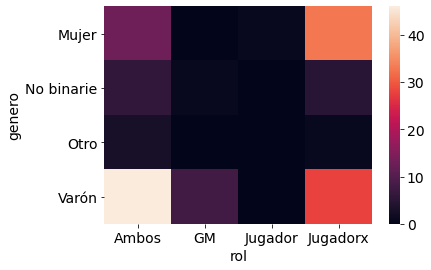

In [ ]:
heat_map(df1['genero'], df1['rol'])

rol         Ambos  GM  Jugador  Jugadorx
genero                                  
Mujer          13   0        1        33
No binarie      6   1        0         5
Otro            3   0        0         1
Varón          46   8        0        28


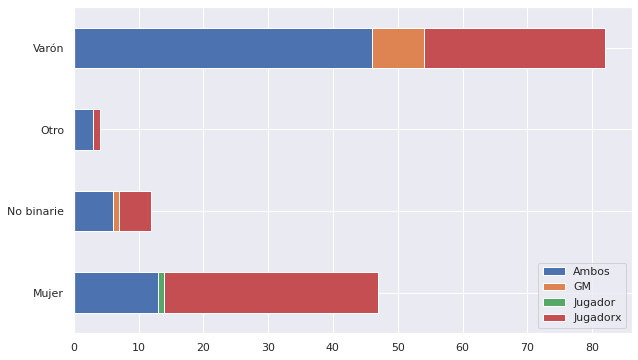

In [241]:
ct=pd.crosstab(index=df1['genero'],columns=df1['rol'])
fig = ct.plot.barh(stacked=True, figsize=(10,6))
plt.legend(title='')
plt.ylabel('')
plt.show()

In [ ]:
# importing the required function
from scipy.stats import chi2_contingency

CrosstabResult=pd.crosstab(index=df1['genero'],columns=df1['grupo'])
#print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
CrosstabResult

The P-Value of the ChiSq Test is: 0.0010597859757829522


grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
genero,,,,,
Mujer,7,27,9,3,1
No binarie,4,4,0,3,1
Otro,0,4,0,0,0
Varón,4,42,14,3,18


In [ ]:
pd.crosstab(index=df1['cistrans'],columns=df1['grupo'])

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
cistrans,,,,,
Cis,8,65,21,6,18
Otro,0,4,0,0,0
Trans,7,5,1,3,0


(grupo     Mayoría de mujeres  Mayoría de varones  ...  Otros  Sólo varones
 cistrans                                          ...                     
 Cis                        8                  65  ...      6            18
 Otro                       0                   4  ...      0             0
 Trans                      7                   5  ...      3             0
 
 [3 rows x 5 columns],
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc886eed5d0>)

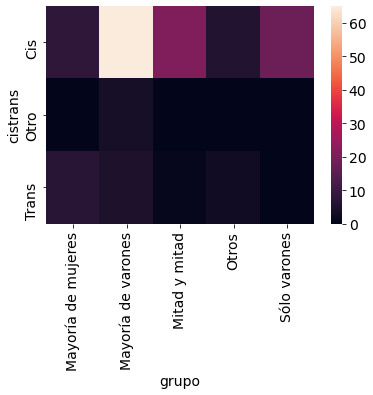

In [ ]:
heat_map(df1['cistrans'], df1['grupo'])

In [ ]:
b = df1[['genero', 'grupo']]
b.head(3)
c = pd.crosstab(index=b['genero'],columns=b['grupo'])
c

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
genero,,,,,
Mujer,7,27,9,3,1
No binarie,4,4,0,3,1
Otro,0,4,0,0,0
Varón,4,42,14,3,18


In [ ]:
a = pd.crosstab(index=df1['genero'],columns=df1['grupo'])
a

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
genero,,,,,
Mujer,7,27,9,3,1
No binarie,4,4,0,3,1
Otro,0,4,0,0,0
Varón,4,42,14,3,18


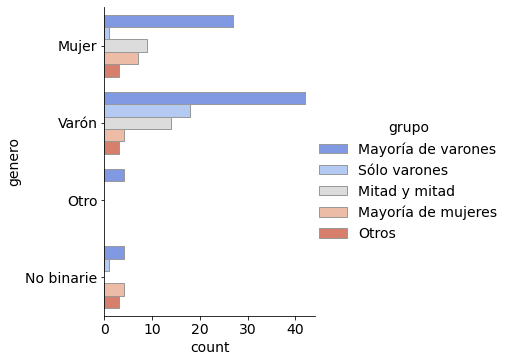

In [ ]:
sns.catplot(y="genero", hue="grupo", kind="count",
            palette="coolwarm", edgecolor=".6",
            data=df1)
plt.show()

##Paises

In [ ]:
# import the library


# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# Show the map
#m

In [ ]:
paises_cuenta = (df1['residencia'].value_counts()[:].to_list())


In [ ]:
paises = (df1['residencia'].value_counts().index.to_list())
paises

['Argentina',
 'España',
 'México',
 'Perú',
 'Chile',
 'Francia',
 'Panamá',
 'Reino Unido',
 'Estados Unidos']

In [ ]:
#lat = [-34.9,39.6,-10.3,23.8, -26.5, 8.6, 55.1, 39.7, 46.7]
#lon = [-65.5, -3.3,-75.4,-102.7, -71.1, -80.0, -2.9, -100.6, 1.8]
#paises = ['Argentina', 'España', 'Perú', 'México', 'Chile','Panamá','Reino Unido','Estados Unidos', 'Francia']

mapa = pd.DataFrame({'lat':[-34.9,39.6,-10.3,23.8, -26.5, 8.6, 55.1, 39.7, 46.7],
                     'lon': [-65.5, -3.3,-75.4,-102.7, -71.1, -80.0, -2.9, -100.6, 1.8],
                     'paises': paises, 
                     #['Argentina', 'España', 'Perú', 'México', 'Chile','Panamá','Reino Unido','Estados Unidos', 'Francia'],
                     'cant': [116,50,40,40,40,20,20,20,20]})

mapa

,lat,lon,paises,cant
0,-34.9,-65.5,Argentina,116
1,39.6,-3.3,España,50
2,-10.3,-75.4,México,40
3,23.8,-102.7,Perú,40
4,-26.5,-71.1,Chile,40
5,8.6,-80.0,Francia,20
6,55.1,-2.9,Panamá,20
7,39.7,-100.6,Reino Unido,20
8,46.7,1.8,Estados Unidos,20


In [ ]:
# add marker one by one on the map
for i in range(0,len(mapa)):
   folium.Circle(
      location=[mapa.iloc[i]['lat'], mapa.iloc[i]['lon']],
      popup=mapa.iloc[i]['paises'],
      radius=float(mapa.iloc[i]['cant']*10000),
      color='#900C3F ',
      fill=True,
      fill_color='#900C3F '
   ).add_to(m)

# Show the map again
m

##Word Cloud

In [ ]:
#comentarios = df['comentario'].dropna().to_list()
#comentarios

In [ ]:
frases = ' '.join(df['comentario'].dropna().to_list())
#frases

In [ ]:
palabras = [palabra.strip(string.punctuation) for palabra in frases.split()]

In [ ]:
contador_palabras=Counter(palabras)
palabras_ordenadas = sorted(contador_palabras.items(), key=lambda x: x[1], reverse=True)

#for i in palabras_ordenadas:
#	print(i[0], i[1])

In [ ]:
pal= ['adolescente', 'segregado','hetero','chicas','partidas','sexo','rol',
      'mesas', 'discriminación', 'personaje', 'juego', 'experiencia', 'amigos', 
      'personas','mujeres', 'grupos', 'sexual', 'varones', 'cis', 'queer', 
      'rolear','ignorancia','sexo','vida','personas','mesa', 'mujer', 'hombres',
      'mundo', 'varones','jugar','orientación', 'pregunta', 'género', 'confianza', 
      'inclusivo', 'alguien','confianza', 'Creo', 'sé', 'uso','interpretar',
      'distinto', 'medio','parte','falta','grupo','gente','mesa']

palabras_filtradas = {}
for key, value in contador_palabras.items():
    if (key in pal):

        palabras_filtradas[key] = value

#print(palabras_filtradas)

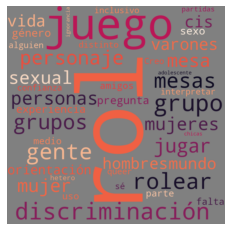

In [ ]:
nube_palabras = WordCloud(width = 1000, height = 1000, colormap='rocket',
                          background_color="grey").generate_from_frequencies(palabras_filtradas)
# Display the generated image:
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()